In [1]:
import os
import pydicom
import numpy as np
from detect_points1 import detect_spheres_from_dicom

[Taichi] version 1.7.3, llvm 15.0.1, commit 5ec301be, win, python 3.8.12
[Taichi] Starting on arch=x64


In [2]:

dicom_path = "C:/Users/huang/Downloads/dicom_data_bad_01"
dicom_files = []
for root, dirs, files in os.walk(dicom_path):
    for file in files:
        if file.endswith('.dcm'):
            dicom_files.append(os.path.join(root, file))
dicom_files.sort()
slices = list()
for f in dicom_files:
    try:
        ds = pydicom.dcmread(f, force=True)
        if hasattr(ds, 'pixel_array'):  # 确保文件包含像素数据
            slices.append(ds)
        else:
            print(f"⚠️ 无像素数据: {f}")
            # print(ds.pixel_array.shape)
    except Exception as e:
        print(f"❌ 读取失败: {f}, 错误: {e}")
slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
data = np.stack([s.pixel_array for s in slices])

pixel_spacing = slices[0].PixelSpacing  # x,y轴间隔
if hasattr(slices[0], 'SpacingBetweenSlices'):  # Z轴间隔
    thickness = slices[0].SpacingBetweenSlices
else:
    thickness = abs(slices[1].ImagePositionPatient[2] - slices[0].ImagePositionPatient[2])
pos_ori = slices[-1].ImagePositionPatient

spheres, p_bounds, z_bon, zp_points = detect_spheres_from_dicom(data=data, pixel_spacing=pixel_spacing, thickness=thickness, pos_ori=pos_ori, output_points=10)
# for key, value in p_bounds.items():
#     print(key)
#     print(value)


278 31
279 41
280 93
281 55
282 57
283 30
284 2
[172, 212, 280, 287, 319, 334, 346, 380, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
得票数=71.0
圆心 (287.0, 141.0, 304.0) 的边界点：146
得票数=71.0
圆心 (319.0, 149.0, 253.0) 的边界点：150
得票数=60.0
圆心 (346.0, 158.0, 253.0) 的边界点：142
得票数=46.0
圆心 (172.0, 500.0, 84.0) 的边界点：115
得票数=43.0
圆心 (212.0, 500.0, 73.0) 的边界点：89
得票数=43.0
圆心 (280.0, 473.0, 65.0) 的边界点：134
得票数=42.0
圆心 (280.0, 136.0, 266.0) 的边界点：122
得票数=40.0
圆心 (334.0, 508.0, 59.0) 的边界点：132
得票数=35.0
圆心 (280.0, 461.0, 59.0) 的边界点：105
得票数=35.0
圆心 (280.0, 466.0, 65.0) 的边界点：102


122 280.0 136.0 266.0


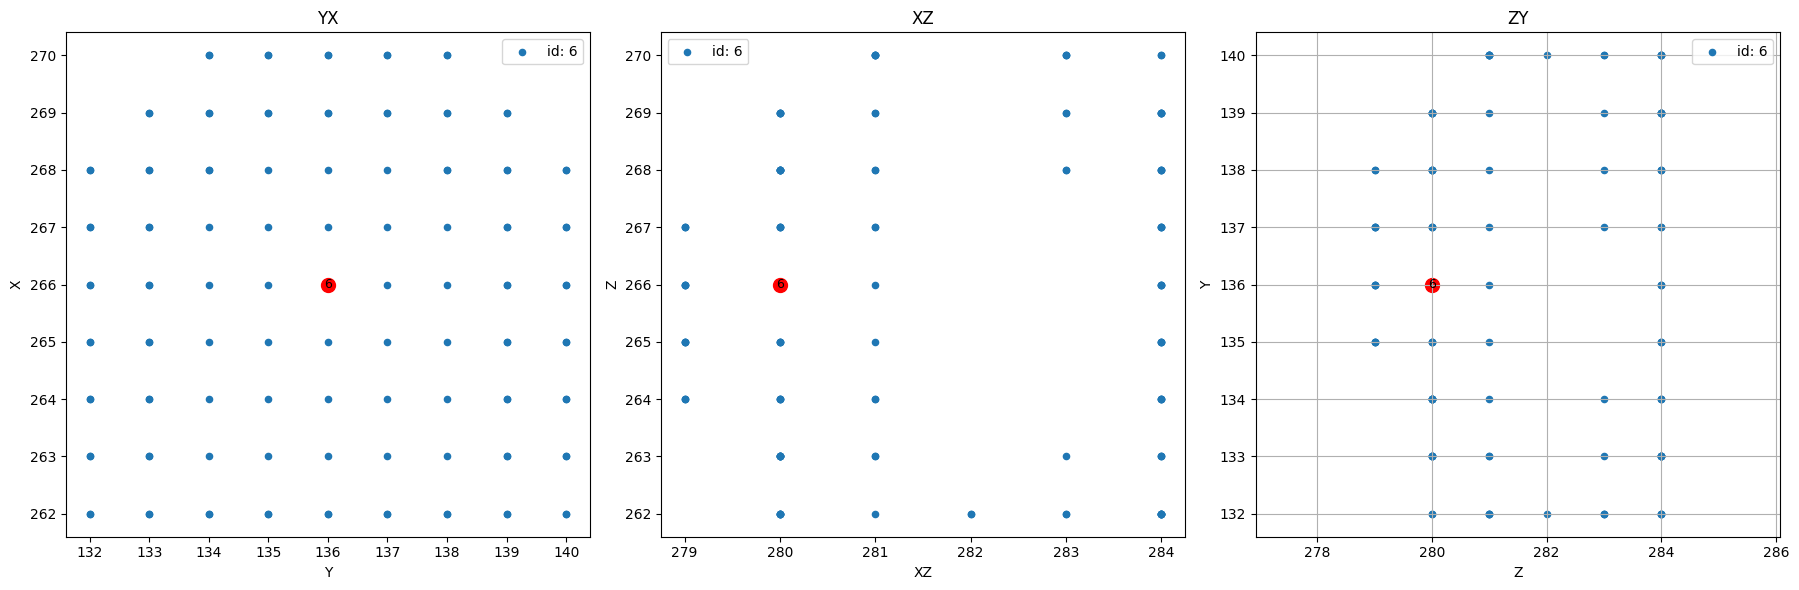

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 1行2列子图

for idx, ((cx, cy, cz), boundary_points) in enumerate(p_bounds.items()):
    if not boundary_points:
        continue
    if (cx, cy, cz) != (280.0, 136.0, 266.0):
    # if (cx, cy, cz) != (319.0, 149.0, 253.0):
        continue
    
    bp = np.array(boundary_points)
    print(len(bp), cx, cy, cz)

    # ✅ 确认这是正确的 XY 顺序！（有可能你需要换成 bp[:, 2], bp[:, 1] 视情况）
    x = bp[:, 0]
    y = bp[:, 1]
    z = bp[:, 2]

    ax1.scatter(y, z, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax1.scatter(cy, cz, color='red', s=100, marker='o')
    ax1.text(cy, cz, f'{idx}', fontsize=9, ha='center', va='center')
    
    
    ax2.scatter(x, z, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax2.scatter(cx, cz, color='red', s=100, marker='o')
    ax2.text(cx, cz, f'{idx}', fontsize=9, ha='center', va='center')
    
    ax3.scatter(x, y, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax3.scatter(cx, cy, color='red', s=100, marker='o')
    ax3.text(cx, cy, f'{idx}', fontsize=9, ha='center', va='center')

ax1.set_title("YX")
ax1.set_xlabel("Y")
ax1.set_ylabel("X")
ax1.legend()
ax2.set_title("XZ")
ax2.set_xlabel("XZ")
ax2.set_ylabel("Z")
ax2.legend()
ax3.set_title("ZY")
ax3.set_xlabel("Z")
ax3.set_ylabel("Y")
ax3.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
def count_points_in_space(center, boundary_points):
    cx, cy, cz = center
    bp = np.array(boundary_points)
    counts = [0] * 8
    for x, y, z in bp:
        region = 0
        if x > cx: region += 1
        if y > cy: region += 2
        if z > cz: region += 4
        counts[region] += 1
    return counts

In [6]:
for center, bounds in p_bounds.items():
    counts = count_points_in_space(center=center, boundary_points=bounds)
    print(counts)

[26, 24, 18, 16, 19, 19, 12, 12]
[25, 25, 19, 19, 18, 19, 12, 13]
[23, 17, 17, 13, 20, 20, 17, 15]
[23, 18, 11, 21, 15, 9, 12, 6]
[3, 29, 5, 5, 6, 18, 7, 16]
[28, 22, 14, 15, 12, 12, 15, 16]
[21, 17, 15, 17, 11, 18, 8, 15]
[23, 23, 15, 15, 16, 16, 12, 12]
[28, 0, 16, 0, 29, 0, 24, 8]
[32, 14, 20, 20, 2, 0, 8, 6]


Text(0.5, 1.0, 'cx histogram for this ball')

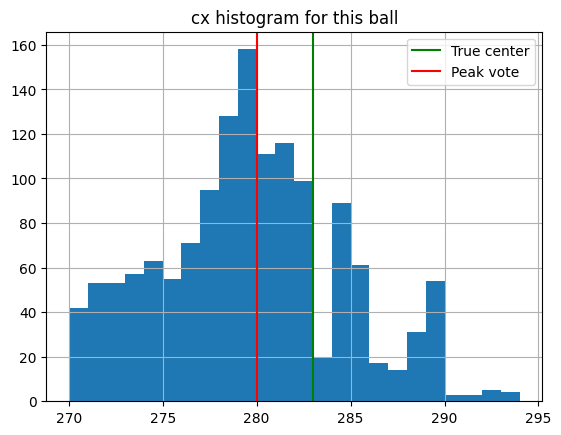

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bonz_list = list(z_bon)
bonz_list = [i for i in bonz_list if i != 0]  # 极值投票的时候被投掉了

plt.hist(bonz_list, bins=range(270, 295))
plt.axvline(283, color='green', label='True center')
plt.axvline(280, color='red', label='Peak vote')
plt.legend()
plt.grid()
plt.title('cx histogram for this ball')




In [5]:
import numpy as np
from numpy.linalg import svd, norm

def fit_circle_3d(points):
    points = np.array(points)
    centroid = points.mean(axis=0)

    # 去中心化
    centered = points - centroid

    # 步骤 1：SVD 拟合平面
    _, _, vh = svd(centered)
    normal = vh[2]  # 平面法向量

    # 步骤 2：构建局部 2D 坐标系（u, v）
    u = vh[0]
    v = vh[1]

    # 步骤 3：将 3D 点投影到局部平面
    projected_2d = np.array([[np.dot(p - centroid, u), np.dot(p - centroid, v)] for p in points])

    # 步骤 4：2D 圆拟合
    xu, yu = projected_2d[:, 0], projected_2d[:, 1]
    A = np.c_[2 * xu, 2 * yu, np.ones(len(xu))]
    b = xu**2 + yu**2
    sol, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    uc, vc, c = sol
    r = np.sqrt(c + uc**2 + vc**2)

    # 步骤 5：局部坐标转回世界坐标
    center3d = centroid + uc * u + vc * v

    return center3d, r, normal

# 示例数据（3D 圆点）
# points = [ [x1,y1,z1], [x2,y2,z2], ... ]
# points = p_bounds[(280.0, 136.0, 266.0)]
for center, points in p_bounds.items():
    center3d, r, normal = fit_circle_3d(points=points)
    print(center, center3d, r, normal)

(287.0, 141.0, 304.0) [286.58025009 140.65731876 303.85355765] 3.434939357900525 [ 0.99799111 -0.06313399 -0.00527728]
(319.0, 149.0, 253.0) [319.1815871  148.82047938 252.76177308] 3.4783936434030363 [ 0.99901429  0.04418982 -0.00420851]
(346.0, 158.0, 253.0) [345.42411257 158.0021144  253.60934957] 3.403393166240266 [0.9969327  0.02909018 0.07265643]
(172.0, 500.0, 84.0) [172.51661011 499.90465644  83.54995581] 3.22380130214757 [-0.70049069  0.266781   -0.66192197]
(212.0, 500.0, 73.0) [213.71325678 499.82993349  73.00679965] 3.696436892571606 [ 0.78387393  0.60249422 -0.15014118]
(280.0, 473.0, 65.0) [280.0008392  473.03387161  64.91635695] 3.4164149730407734 [ 0.99040168 -0.13459149 -0.03145876]
(280.0, 136.0, 266.0) [281.51568201 136.00889429 265.64459247] 3.7241765106403686 [-0.9981762   0.00935077  0.05963925]
(334.0, 508.0, 59.0) [334.27518869 507.87624022  58.93257009] 3.2946458124989517 [ 0.99623006  0.06325651 -0.05936572]
(280.0, 461.0, 59.0) [278.16445039 460.85097355  59.

1081 1064 281 480 64
1080 1109 281 480 70
1077 1053 281 481 64
1104 1114 281 481 70
1103 1096 281 466 65
1085 1093 280 466 66
1132 1064 281 467 65
1131 1087 281 467 66
1090 1147 281 468 61
1121 1077 281 468 65
1128 1124 281 468 66
1085 1123 280 468 67
1060 1053 281 484 65
1065 1088 281 469 61
1050 1082 281 469 62
1078 1093 282 469 63
1074 1122 282 469 64
1088 1095 281 469 65
1090 1135 281 469 66
1097 1120 281 469 67
1078 1069 282 485 68
1059 1072 282 485 69
1089 1101 280 470 60
1085 1081 281 470 61
1083 1068 281 470 62
1097 1101 282 470 63
1110 1138 282 470 64
1111 1143 282 470 65
1082 1131 281 470 66
1099 1123 281 470 67
1077 1097 281 486 66
1089 1077 282 486 67
1075 1053 282 486 68
1067 1057 282 486 69
1078 1087 281 486 70
1081 1086 281 486 71
1127 1117 281 471 62
1152 1124 282 471 63
1151 1131 282 471 64
1136 1107 282 471 65
1144 1109 282 471 66
1118 1135 281 471 67
1094 1110 281 487 66
1098 1072 282 487 67
1096 1064 282 487 68
1095 1069 282 487 69
1079 1098 281 487 70
1068 1091 281

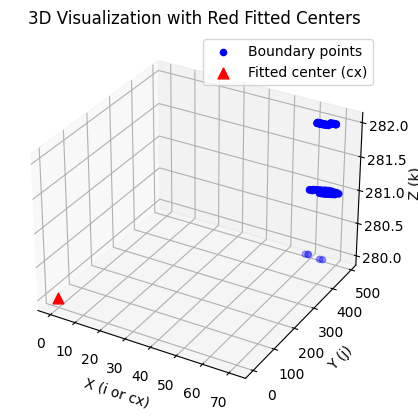

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设 zp_points 是一个字典，每个 value 是 (cx, i, j, k)
cx_list = []
i_list = []
j_list = []
k_list = []

last_i = 0
all_dict = dict()

for val in zp_points:
    cx, i, j, k = val
    if cx != 280:
        continue
    print(data[i, j, k], data[i + 1, j, k], i, j, k)
    cx_list.append(cx)
    i_list.append(i)
    j_list.append(j)
    k_list.append(k)

print(len(i_list))

# 创建 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 画边界点（i, j, k）为蓝色
ax.scatter(k_list, j_list, i_list, c='blue', marker='o', label='Boundary points')

# 画圆心（cx, j, k）为红色（你也可以换成别的组合）
ax.scatter([0], [0], [280], c='red', marker='^', s=60, label='Fitted center (cx)')

# 设置坐标轴和图例
ax.set_xlabel('X (i or cx)')
ax.set_ylabel('Y (j)')
ax.set_zlabel('Z (k)')
ax.legend()
plt.title("3D Visualization with Red Fitted Centers")
plt.show()


<Figure size 800x800 with 0 Axes>

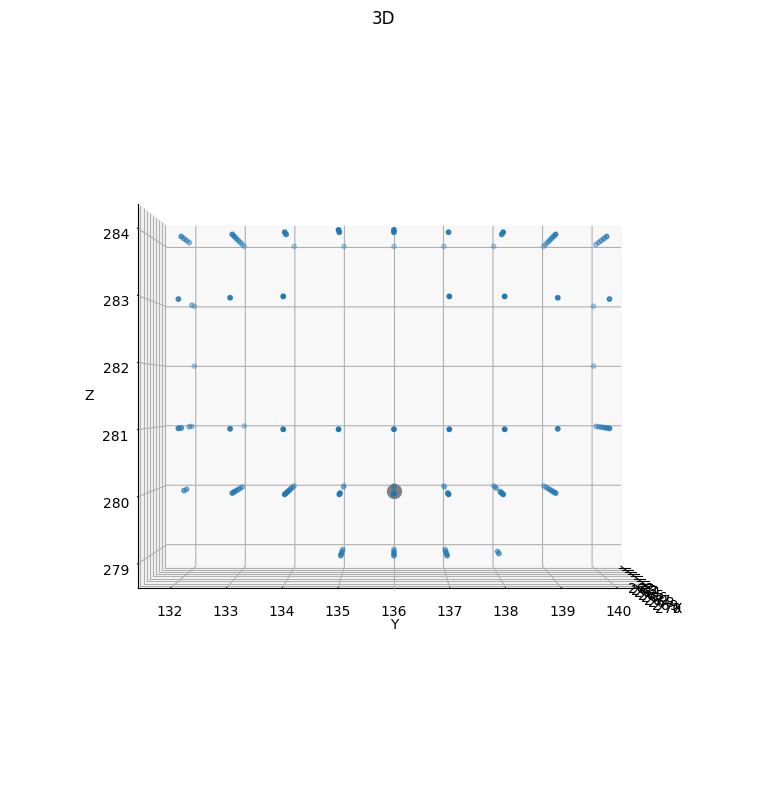

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
view = 0

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for idx, ((cx, cy, cz), boundary_points) in enumerate(p_bounds.items()):
    if not boundary_points:
        continue
    if (cx, cy, cz) != (280.0, 136.0, 266.0):
        continue

    bp = np.array(boundary_points)
    xs, ys, zs = bp[:, 2], bp[:, 1], bp[:, 0]

    # 画边界点
    ax.scatter(xs, ys, zs, s=10, label=f"id: {idx}")

    # 画圆心
    ax.scatter(cz, cy, cx, s=100, color='gray')
    ax.text(cx + 0.5, cy + 0.5, cz + 0.5, f'{idx}', fontsize=15, ha='center', va='center')

# 从 X 轴方向看（YZ 平面）
if view == 0:
    ax.view_init(elev=0, azim=0)  # 俯视，从正上方看
elif view == 1:
    # 从 Y 轴方向看（XZ 平面）
    ax.view_init(elev=0, azim=90)  # azim=90 表示 Y 轴方向
else:
    # 从 Z 轴方向看（XY 平面）
    ax.view_init(elev=90, azim=-90)  # azim=0 表示 X 轴方向

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D")
plt.tight_layout()
plt.show()
